# pyrootmemo example for main conference talk



Load objects

In [96]:
from pyrootmemo.materials import MultipleRoots, Interface, Soil
from pyrootmemo.geometry import SoilProfile, FailureSurface
from pyrootmemo.models import Wwm, Fbm, Rbmw, Waldron
from pyrootmemo.helpers import Parameter

Define input parameters

In [97]:
roots = MultipleRoots(
    species = "test_species",
    diameter = Parameter([3, 4, 5], 'mm'),
    tensile_strength = Parameter([20, 16, 10], 'MPa'),
    elastic_modulus = Parameter([200, 180, 160], 'MPa'),
    length = Parameter([300, 400, 500], 'mm')
)

interface = Interface(shear_strength = Parameter(10, 'kPa'))

failure_surface = FailureSurface(
    cross_sectional_area = Parameter(0.1, 'm^2'),
    depth = Parameter(0.5, 'm'),
    shear_zone_thickness = Parameter(10, 'mm')
    )

sand = Soil(
    'sand', 
    cohesion = Parameter(0, 'kPa'), 
    friction_angle = Parameter(30, 'deg')
    )

soil_profile = SoilProfile(
    [sand],
    depth = Parameter([10], 'm'),
)

Wu/Waldron model

In [98]:
wwm = Wwm(roots)
print(wwm.peak_reinforcement(failure_surface).to('kPa'))

6.4653976810877944 kilopascal


Fibre Bundle Model

4.241150082346222 kilopascal


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Force in reference root [N]', ylabel='Total force in root bundle [N]'>)

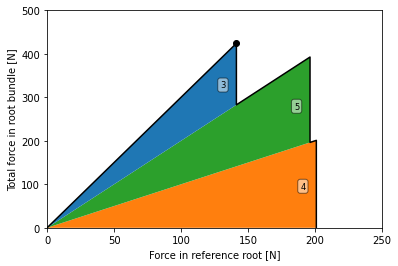

In [102]:
fbm = Fbm(roots, load_sharing = 0.0)
print(fbm.peak_reinforcement(failure_surface).to('kPa'))
fbm.plot(stack = True, labels = [3, 4, 5])

Root Bundle Model (weibull)

3.4395389167498864 kilopascal


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Pull-out displacement [mm]', ylabel='Total force in root bundle [N]'>)

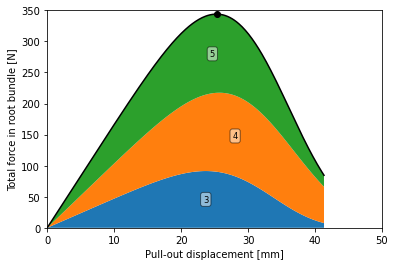

In [100]:
rbmw = Rbmw(roots, weibull_shape = 5)
print(rbmw.peak_reinforcement(failure_surface)['reinforcement'].to('kPa'))
rbmw.plot(stack = True, labels = [3, 4, 5])

Waldron's model

1.8098877001445366 kilopascal


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Shear displacement [mm]', ylabel='Reinforcement [kPa]'>)

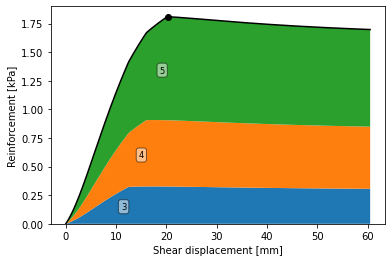

In [104]:
waldron = Waldron(roots, interface, soil_profile, failure_surface, slipping = True)
print(waldron.peak_reinforcement()['reinforcement'].to('kPa'))
waldron.plot(stack = True, labels = [3, 4, 5], margin_axis = 2)